# Velocity dispersion like a resolution matrix

A spectroperfectionism "resolution matrix" encodes a wavelength dependent non-Gaussian line-spread function.
DESI/specter encodes this as diagonals of a sparse matrix that can be used to effiently apply resolution
to a model.  The same basic idea can be used to apply velocity dispersion to a model, without needing to
use any spectroperfectionism / specter / desispec infrastructure.

Stephen Bailey, 2021-04-25

In [1]:
%pylab inline
import numpy as np
from scipy.sparse import dia_matrix

Populating the interactive namespace from numpy and matplotlib


In [2]:
dwave = 0.8                           #- wavelength binning step size Angstroms/pixel
wave = np.arange(3600, 9800, dwave)   #- wavelenth sampling in Angstroms
nwave = len(wave)                     #- number of wavelength steps
model = np.zeros(len(wave))           #- toy model with delta functions
model[100::500] += 100

In [3]:
c = 3e5        #- speed of light in km/s
vdisp = 300    #- velocity dispersion in km/s
wdisp_A = wave * vdisp / c   #- wavelength dispersion in A
wdisp_pix = wdisp_A / dwave  #- wavelength dispersion in pixels

Text(0, 0.5, 'Wavelength dispersion in pixels')

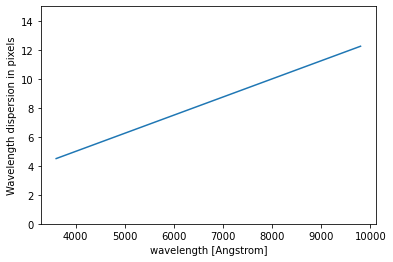

In [4]:
#- note that constant velocity dispersion -> non-constant wavelength dispersion
plot(wave, wdisp_pix)
ylim(0, 15); xlabel('wavelength [Angstrom]'); ylabel('Wavelength dispersion in pixels')

In [10]:
#- sparse matrix to apply that velocity dispersion efficienty
nsigma = 3
ndiags = 2*int(nsigma * np.max(wdisp_pix)) + 1
mid = ndiags//2

diags = np.zeros((ndiags, nwave))
for i in range(ndiags//2):
    diags[mid+i] = diags[mid-i] = np.exp(-(i**2 / (2*wdisp_pix**2)))

#- normalize each column to 1
diags /= np.sum(diags, axis=0)

#- make a sparse matrix
offsets = np.arange(ndiags) - mid
R = dia_matrix( (diags, offsets), shape=(nwave, nwave))

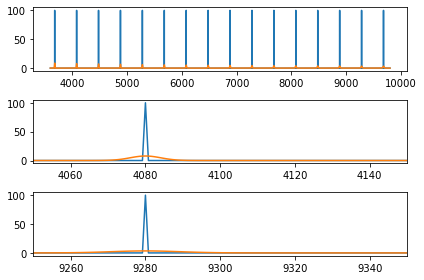

In [14]:
#- Let's try it
subplot(311)
plot(wave, model)
plot(wave, R*model)
subplot(312)
plot(wave, model)
plot(wave, R*model)
xlim(4050, 4150)
subplot(313)
plot(wave, model)
plot(wave, R*model)
xlim(9250, 9350)
tight_layout()

In [9]:
#- did I get normalization right?
print(np.sum(model), np.sum(R*model))
ii = (4000 < wave) & (wave < 4100)
print(np.sum(model[ii]), np.sum((R*model)[ii]))
ii = (9250 < wave) & (wave < 9350)
print(np.sum(model[ii]), np.sum((R*model)[ii]))

1600.0 1600.0000000000002
100.0 99.99992513157116
100.0 100.0
